<a href="https://colab.research.google.com/github/ak424/smartknower/blob/master/Job_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [287]:
df=pd.read_csv('/content/drive/My Drive/python/datasets_633_1202_jobclassinfo2.csv')

In [288]:
df

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,15,Systems Analyst,62,Systems Analyst I,3,1,1,1,2,1,1,1,PG03
62,63,15,Systems Analyst,63,Systems Analyst II,5,4,1,3,3,4,3,4,PG05
63,64,15,Systems Analyst,64,Systems Analyst III,6,5,2,4,4,5,7,5,PG06
64,65,15,Systems Analyst,65,Systems Analyst IV,8,5,5,6,5,6,7,7,PG08


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    66 non-null     int64 
 1   JobFamily             66 non-null     int64 
 2   JobFamilyDescription  66 non-null     object
 3   JobClass              66 non-null     int64 
 4   JobClassDescription   66 non-null     object
 5   PayGrade              66 non-null     int64 
 6   EducationLevel        66 non-null     int64 
 7   Experience            66 non-null     int64 
 8   OrgImpact             66 non-null     int64 
 9   ProblemSolving        66 non-null     int64 
 10  Supervision           66 non-null     int64 
 11  ContactLevel          66 non-null     int64 
 12  FinancialBudget       66 non-null     int64 
 13  PG                    66 non-null     object
dtypes: int64(11), object(3)
memory usage: 7.3+ KB


In [290]:
df

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,15,Systems Analyst,62,Systems Analyst I,3,1,1,1,2,1,1,1,PG03
62,63,15,Systems Analyst,63,Systems Analyst II,5,4,1,3,3,4,3,4,PG05
63,64,15,Systems Analyst,64,Systems Analyst III,6,5,2,4,4,5,7,5,PG06
64,65,15,Systems Analyst,65,Systems Analyst IV,8,5,5,6,5,6,7,7,PG08


In [291]:
df.shape

(66, 14)

In [292]:
df.isnull().sum()

ID                      0
JobFamily               0
JobFamilyDescription    0
JobClass                0
JobClassDescription     0
PayGrade                0
EducationLevel          0
Experience              0
OrgImpact               0
ProblemSolving          0
Supervision             0
ContactLevel            0
FinancialBudget         0
PG                      0
dtype: int64

In [293]:
from sklearn.preprocessing import LabelEncoder

JobFamilyDescription = LabelEncoder()
JobClassDescription  = LabelEncoder()
PG = LabelEncoder()
df['JobFamilyDescription1'] = JobFamilyDescription.fit_transform(df['JobFamilyDescription'])
df['JobClassDescription1'] = JobClassDescription.fit_transform(df['JobClassDescription'])
df['PG1']  = PG.fit_transform(df['PG'])

In [294]:
df.drop(['PG','ID','JobFamilyDescription','JobClassDescription',],axis=1, inplace=True)

In [295]:
df

,JobFamily,JobClass,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,JobFamilyDescription1,JobClassDescription1,PG1
0,1,1,5,3,1,3,3,4,3,5,0,0,4
1,1,2,6,4,1,5,4,5,7,7,0,1,5
2,1,3,8,4,2,6,5,6,7,10,0,2,7
3,1,4,10,5,5,6,6,7,8,11,0,3,9
4,2,5,1,1,0,1,1,1,1,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,15,62,3,1,1,1,2,1,1,1,14,61,2
62,15,63,5,4,1,3,3,4,3,4,14,62,4
63,15,64,6,5,2,4,4,5,7,5,14,63,5
64,15,65,8,5,5,6,5,6,7,7,14,64,7


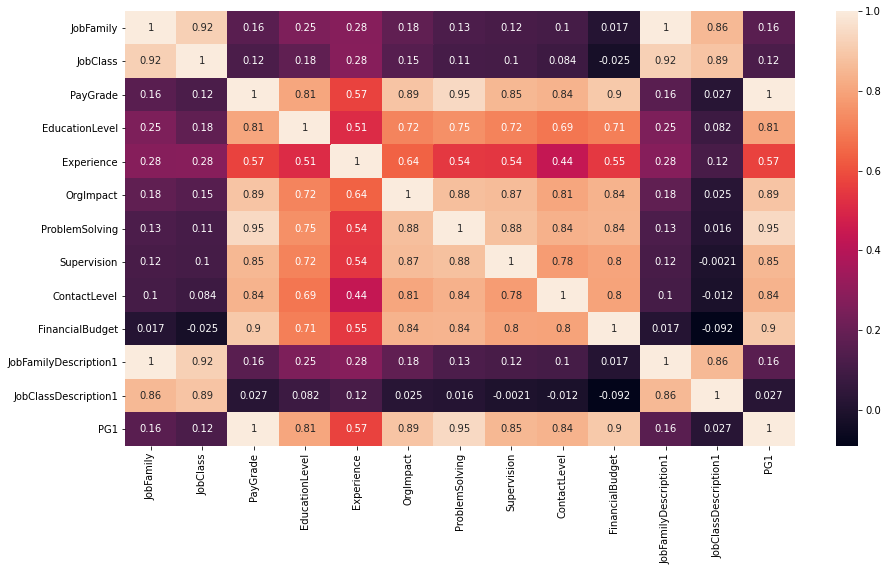

In [296]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

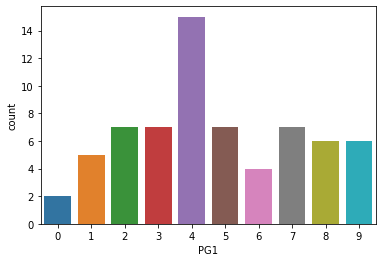

In [311]:
sns.countplot(df['PG1'])

In [298]:
df.shape

(66, 13)

In [299]:
x = df.iloc[:,0:12].values
y = df.iloc[:,12].values

In [300]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=11)

In [301]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [302]:
from sklearn.tree import DecisionTreeClassifier

In [303]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [306]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pr)*100

88.23529411764706

In [307]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_test,y_pr)

Text(69.0, 0.5, 'actual')

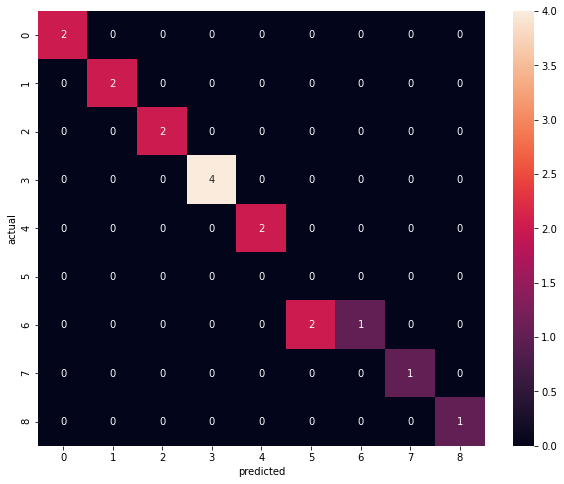

In [308]:
plt.figure(figsize=(10,8))
sns.heatmap(a, annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [309]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1

    accuracy                           0.88        17
   macro avg       0.72      0.72      0.70        17
weighted avg       0.91      0.88      0.88        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [310]:
y_pred_df=pd.DataFrame({"actual":y_test,"predictedfrom_model":y_pred})
y_pred_df.sample(15,random_state=42)

,actual,predictedfrom_model
0,5,5
1,7,7
5,4,4
15,9,8
11,3,3
14,2,2
8,5,5
13,7,7
2,7,7
9,4,4
